In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "C:/Users/vansh/.kaggle"
!kaggle datasets download -d alyelbadry/titanic-survive-model

^C


Dataset URL: https://www.kaggle.com/datasets/alyelbadry/titanic-survive-model
License(s): apache-2.0




  0%|          | 0.00/22.3k [00:00<?, ?B/s]
100%|██████████| 22.3k/22.3k [00:00<00:00, 19.2MB/s]


In [4]:
train_df = pd.read_csv(r'D:\ml-journey\Titanic Survival Prediction - miniProject\data\train.csv' , sep=';')
test_df = pd.read_csv(r'D:\ml-journey\Titanic Survival Prediction - miniProject\data\test.csv', sep=';')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [6]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,369,Yes,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.7500,NaN,Q
1,474,Yes,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C
2,667,No,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
3,142,Yes,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S
4,143,Yes,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S


In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            156
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          615
Embarked         2
dtype: int64

In [8]:
test_df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            21
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          72
Embarked        0
dtype: int64

In [9]:
train_df = train_df.drop(columns=['Cabin'])

In [10]:
test_df = test_df.drop(columns=['Cabin'])

In [11]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,369,Yes,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.7500,Q
1,474,Yes,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,C
2,667,No,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,S
3,142,Yes,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,S
4,143,Yes,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,S


In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [13]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

In [14]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

In [15]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
678,80,Yes,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,S
273,519,Yes,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,S
500,709,Yes,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,S
385,156,No,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,C
592,144,No,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,Q


In [16]:
test_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
41,696,No,2,"Chapman, Mr. Charles Henry",male,52.000000,0,0,248731,13.50,S
66,304,Yes,2,"Keane, Miss. Nora A",female,29.076923,0,0,226593,12.35,Q
36,263,No,1,"Taussig, Mr. Emil",male,52.000000,1,1,110413,79.65,S
58,236,No,3,"Harknett, Miss. Alice Phoebe",female,29.076923,0,0,W./C. 6609,7.55,S
85,271,No,1,"Cairns, Mr. Alexander",male,29.076923,0,0,113798,31.00,S


In [17]:
test_df['Age'] = test_df['Age'].round()
train_df['Age'] = train_df['Age'].round()

In [18]:
test_df.head().sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
3,142,Yes,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,S
0,369,Yes,3,"Jermyn, Miss. Annie",female,29.0,0,0,14313,7.7500,Q
2,667,No,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,S
4,143,Yes,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,S
1,474,Yes,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,C


In [19]:
test_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [21]:
print(train_df['Embarked'].mode()[0])

S


In [22]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [23]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
train_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,447.420455,2.315657,29.813131,0.527778,0.388889,32.799705
std,256.756534,0.834683,12.910092,1.121781,0.818730,51.130795
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,452.500000,3.000000,30.000000,0.000000,0.000000,14.500000
75%,668.250000,3.000000,35.000000,1.000000,0.000000,31.275000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,434.636364,2.252525,29.070707,0.484848,0.323232,27.440235
std,263.132405,0.849291,13.759785,0.940730,0.697346,36.043308
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,233.000000,1.000000,22.000000,0.000000,0.000000,7.854200
50%,407.000000,3.000000,29.000000,0.000000,0.000000,13.000000
75%,670.000000,3.000000,34.500000,1.000000,0.000000,29.356250
max,888.000000,3.000000,70.000000,5.000000,3.000000,227.525000


In [26]:
import seaborn as sns

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

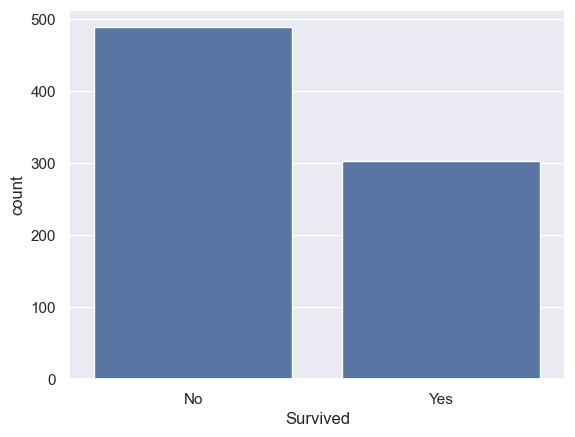

In [31]:
sns.countplot(x='Survived', data=train_df)

<Axes: xlabel='Survived', ylabel='count'>

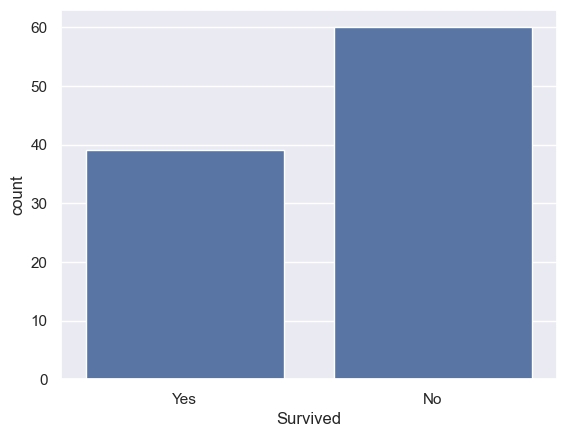

In [32]:
sns.countplot(x='Survived', data=test_df)

<Axes: xlabel='Sex', ylabel='count'>

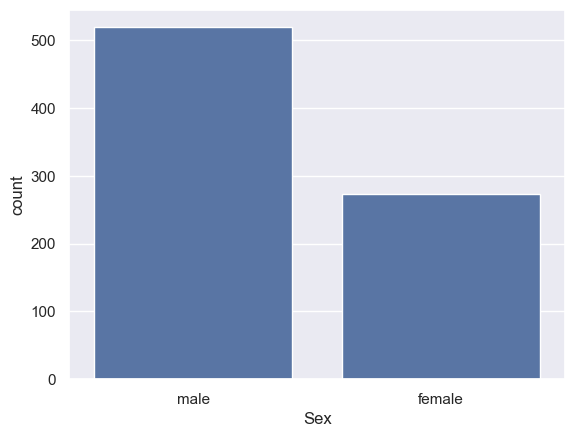

In [33]:
sns.countplot(x='Sex', data=train_df)

<Axes: xlabel='Sex', ylabel='count'>

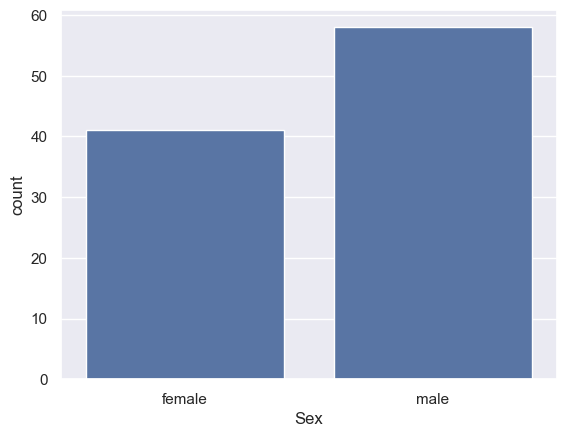

In [ ]:
sns.countplot(x='Sex', data=test_df)

<Axes: xlabel='Survived', ylabel='count'>

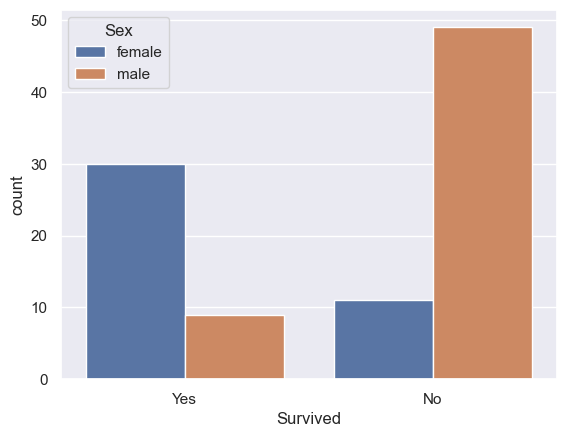

In [36]:
sns.countplot(x='Survived', hue='Sex',data=test_df)

<Axes: xlabel='Sex', ylabel='count'>

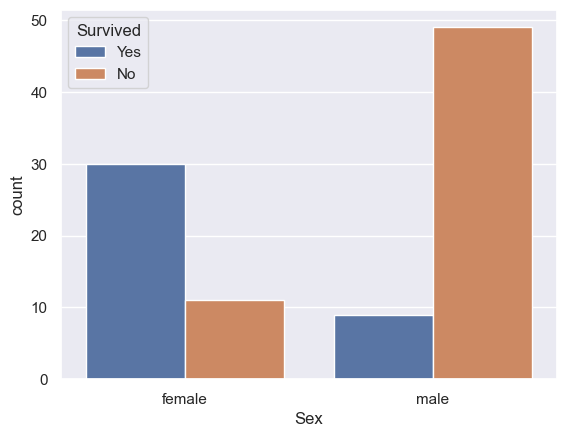

In [37]:
sns.countplot(x='Sex', hue='Survived',data=test_df)

<Axes: xlabel='Pclass', ylabel='count'>

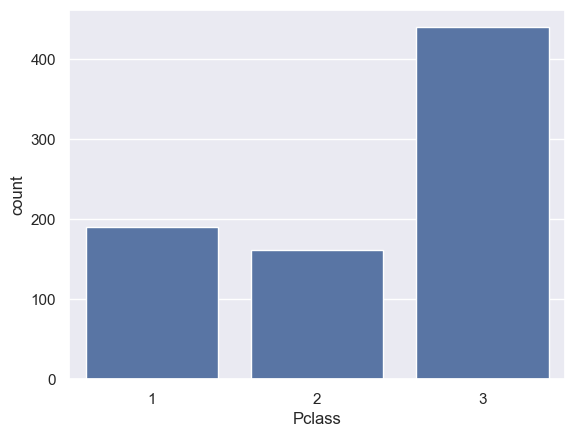

In [38]:
sns.countplot(x="Pclass", data=train_df)

<Axes: xlabel='Pclass', ylabel='count'>

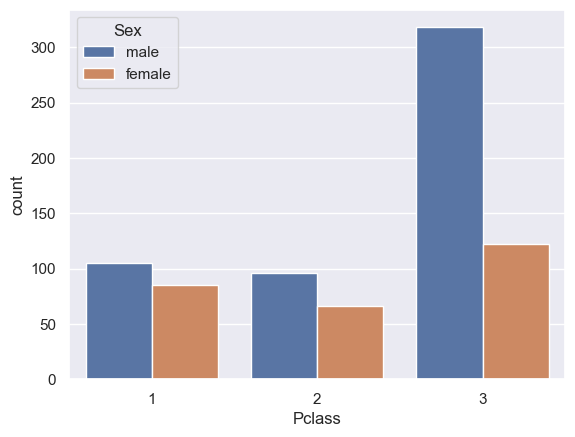

In [39]:
sns.countplot(x="Pclass", hue="Sex", data=train_df)

<Axes: xlabel='Pclass', ylabel='count'>

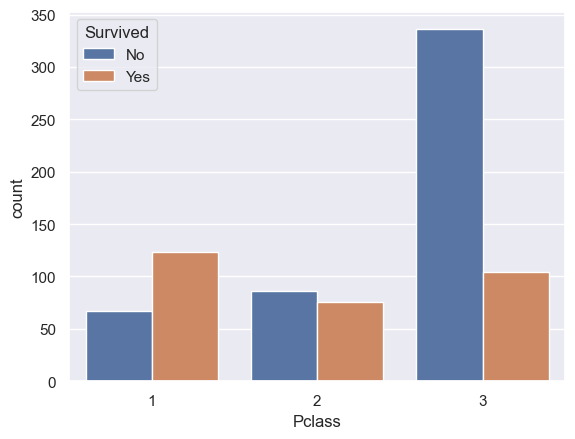

In [40]:
sns.countplot(x="Pclass", hue="Survived", data=train_df)

In [41]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [43]:
train_df['Sex'].value_counts()

Sex
male      519
female    273
Name: count, dtype: int64

In [44]:
train_df['Survived'].value_counts()

Survived
No     489
Yes    303
Name: count, dtype: int64

In [45]:
train_df['Embarked'].value_counts()

Embarked
S    574
C    149
Q     69
Name: count, dtype: int64

In [62]:
train_df['Sex'] = train_df['Sex'].replace({'male': 0, 'female': 1}).infer_objects(copy=False)
train_df['Embarked'] = train_df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}).infer_objects(copy=False)
train_df['Survived'] = train_df['Survived'].replace({'No': 0, 'Yes': 1}).infer_objects(copy=False)


C:\Users\vansh\AppData\Local\Temp\ipykernel_12876\1408099853.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Survived'] = train_df['Survived'].replace({'No': 0, 'Yes': 1}).infer_objects(copy=False)


In [63]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,0
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,0
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,0


In [64]:
test_df['Sex'] = test_df['Sex'].replace({'male': 0, 'female': 1}).infer_objects(copy=False)
test_df['Embarked'] = test_df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}).infer_objects(copy=False)
test_df['Survived'] = test_df['Survived'].replace({'No': 0, 'Yes': 1}).infer_objects(copy=False)

In [65]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,369,1,3,"Jermyn, Miss. Annie",1,29.0,0,0,14313,7.7500,2
1,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",1,23.0,0,0,SC/AH Basle 541,13.7917,1
2,667,0,2,"Butler, Mr. Reginald Fenton",0,25.0,0,0,234686,13.0000,0
3,142,1,3,"Nysten, Miss. Anna Sofia",1,22.0,0,0,347081,7.7500,0
4,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",1,24.0,1,0,STON/O2. 3101279,15.8500,0


In [66]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,0
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,0
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,0


In [67]:
X_train = train_df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y_test = test_df['Survived']

In [68]:
print(X_train)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         2    0  28.0      0      0  13.0000         0
1         3    0  25.0      0      0   7.6500         0
2         3    0  20.0      0      0   7.8542         0
3         3    1  29.0      0      4  21.0750         0
4         1    0  31.0      1      0  52.0000         0
..      ...  ...   ...    ...    ...      ...       ...
787       1    0  30.0      0      0   0.0000         0
788       2    1  24.0      0      2  14.5000         0
789       3    1  18.0      0      1  14.4542         1
790       3    0  30.0      1      0  15.5000         2
791       1    1  30.0      0      0  56.9292         1

[792 rows x 7 columns]


In [69]:
model = LogisticRegression()

In [70]:
print(Y_train)

0      0
1      0
2      0
3      0
4      0
      ..
787    0
788    1
789    0
790    0
791    1
Name: Survived, Length: 792, dtype: int64


In [71]:
model.fit(X_train, Y_train)

d:\ml-journey\Titanic Survival Prediction - miniProject\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [72]:
X_train_prediction = model.predict(X_train)
print(X_train_prediction)

[0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0
 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1
 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1
 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0
 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1
 1 1 1 1 0 1 0 1 1 0 0 1 

In [74]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy on train data is: ",training_data_accuracy)

Accuracy on train data is:  0.8017676767676768


In [75]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy on test data is: ",test_data_accuracy)

Accuracy on test data is:  0.7777777777777778
